 # Random Forest Regression(Decision Tree) : Urban Bike-Sharing Demand Analysis

 This analysis aims to evaluate the volume of requests for shared bicycles in different conditions. By understanding the patterns and trends in bike request volumes, companies and municipalities can optimize bike deployment, improve service efficiency, and enhance user satisfaction.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Project_Bike/bike_day.csv',delimiter=',')
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Random Forest

In [ ]:
import numpy as np
import sklearn.utils as su
import sklearn.ensemble as se
import sklearn.metrics as sm
import matplotlib.pyplot as mp

In [ ]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
row_0 = data.iloc[0]
row_1 = data.loc[1]
print(row_0)
print(row_1)

instant                1
dteday        2011-01-01
season                 1
yr                     0
mnth                   1
holiday                0
weekday                6
workingday             0
weathersit             2
temp            0.344167
atemp           0.363625
hum             0.805833
windspeed       0.160446
casual               331
registered           654
cnt                  985
Name: 0, dtype: object
instant                2
dteday        2011-01-02
season                 1
yr                     0
mnth                   1
holiday                0
weekday                0
workingday             0
weathersit             2
temp            0.363478
atemp           0.353739
hum             0.696087
windspeed       0.248539
casual               131
registered           670
cnt                  801
Name: 1, dtype: object


In [ ]:
# day_headers = data.iloc[0, 2:13]
# identify input and output
day_headers= np.array(data.columns[2:13])
x = np.array(data.iloc[:, 2:13], dtype=float)
y = np.array(data.iloc[:, -1], dtype=float)
print(day_headers)
# print(x[0])
# print(y[0])
#
print(day_headers.shape, day_headers.dtype)
print(x.shape, x.dtype)
print(y.shape)

['season' 'yr' 'mnth' 'holiday' 'weekday' 'workingday' 'weathersit' 'temp'
 'atemp' 'hum' 'windspeed']
(11,) object
(731, 11) float64
(731,)


In [ ]:
# shuffle dataset, split training dataset and validation dataset
x, y = su.shuffle(x, y, random_state=7)

train_size = int(len(x) * 0.8)

train_x, test_x, train_y, test_y = x[:train_size], x[train_size:], y[:train_size], y[train_size:]


In [ ]:
# RandomForest Model Training
model = se.RandomForestRegressor(
    max_depth=10, n_estimators=1000,
    min_samples_split=2)
model.fit(train_x, train_y)

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [ ]:
# based on "hours" , see the feature_importances
fi_dy = model.feature_importances_
pred_test_y = model.predict(test_x)

print(sm.r2_score(test_y, pred_test_y)) # 用于评估回归模型对观测数据的拟合程度r2_score
print(sm.mean_absolute_error(test_y, pred_test_y)) #绝对误差

0.9061689411391806
411.05922188052233


# plot chart

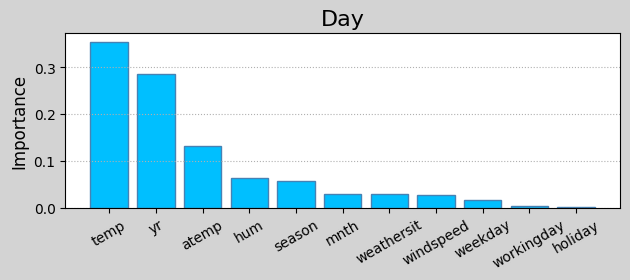

In [ ]:
mp.figure('Bike', facecolor='lightgray')
mp.subplot(211)
mp.title('Day', fontsize=16)
mp.ylabel('Importance', fontsize=12)
mp.tick_params(labelsize=10)
mp.grid(axis='y', linestyle=':')
sorted_indices = fi_dy.argsort()[::-1]
pos = np.arange(sorted_indices.size)
mp.bar(pos, fi_dy[sorted_indices], facecolor='deepskyblue', edgecolor='steelblue')
mp.xticks(pos, day_headers[sorted_indices], rotation=30)

# mp.subplot(212)
# mp.title('Hour', fontsize=16)
# mp.ylabel('Importance', fontsize=12)
# mp.tick_params(labelsize=10)
# mp.grid(axis='y', linestyle=':')
# sorted_indices = fi_hr.argsort()[::-1]
# pos = np.arange(sorted_indices.size)
# mp.bar(pos, fi_hr[sorted_indices], facecolor='lightcoral', edgecolor='indianred')
# mp.xticks(pos, hour_headers[sorted_indices], rotation=30)
mp.tight_layout()
mp.show()